## Coupon Acceptance Prediction

### Imports

In [1]:
# data analysis
import numpy as np
import pandas as pd
import sklearn

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read the Dataset

In [51]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [52]:
train_df.head()

,id,Decision,Driving_to,Passanger,Weather,Temperature,Time,Coupon,Coupon_validity,Gender,...,Education,Occupation,Income,Bar,Coffeehouse,Carryaway,Restaurantlessthan20,Restaurant20to50,Direction_same,Distance
0,1,1,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,...,Some college - no degree,Construction & Extraction,$100000 or More,2.0,0.0,3.0,2.0,2.0,0,2
1,2,0,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,...,Some college - no degree,Unemployed,$62500 - $74999,0.0,1.0,4.0,3.0,0.0,0,2
2,3,1,No Urgent Place,Partner,Sunny,80,6PM,Restaurant(<20),1d,Male,...,Associates degree,Unemployed,$37500 - $49999,1.0,1.0,1.0,3.0,1.0,0,1
3,4,1,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Male,...,Some college - no degree,Construction & Extraction,$100000 or More,2.0,0.0,3.0,2.0,2.0,0,1
4,5,1,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Male,...,Some college - no degree,Arts Design Entertainment Sports & Media,$12500 - $24999,0.0,0.0,2.0,2.0,0.0,1,2


### EDA

In [4]:
train_df.info()
# Variables containing null values: Bar, Coffeehouse, Carryaway, Restaurantlessthan20, Restaurant20to50
# Categorical data: Driving_to, Passanger, Weather, Time, Coupon, Coupon_validity, Gender, Age, Maritalstatus,
# Education, Occupation, Income

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10184 entries, 0 to 10183
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10184 non-null  int64  
 1   Decision              10184 non-null  int64  
 2   Driving_to            10184 non-null  object 
 3   Passanger             10184 non-null  object 
 4   Weather               10184 non-null  object 
 5   Temperature           10184 non-null  int64  
 6   Time                  10184 non-null  object 
 7   Coupon                10184 non-null  object 
 8   Coupon_validity       10184 non-null  object 
 9   Gender                10184 non-null  object 
 10  Age                   10184 non-null  object 
 11  Maritalstatus         10184 non-null  object 
 12  Children              10184 non-null  int64  
 13  Education             10184 non-null  object 
 14  Occupation            10184 non-null  object 
 15  Income             

In [5]:
train_df.describe()

,id,Decision,Temperature,Children,Bar,Coffeehouse,Carryaway,Restaurantlessthan20,Restaurant20to50,Direction_same,Distance
count,10184.000000,10184.000000,10184.000000,10184.000000,10091.000000,10002.000000,10059.000000,10079.000000,10033.000000,10184.000000,10184.000000
mean,5092.500000,0.569914,63.361155,0.414277,1.038846,1.574285,2.416741,2.283064,1.269909,0.211115,1.684309
std,2940.011905,0.495112,19.137079,0.492621,1.095480,1.238135,0.929992,0.919968,0.882393,0.408120,0.675322
min,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2546.750000,0.000000,55.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000
50%,5092.500000,1.000000,80.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,2.000000
75%,7638.250000,1.000000,80.000000,1.000000,2.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000
max,10184.000000,1.000000,80.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,3.000000


In [6]:
train_df.describe(include=['O'])

,Driving_to,Passanger,Weather,Time,Coupon,Coupon_validity,Gender,Age,Maritalstatus,Education,Occupation,Income
count,10184,10184,10184,10184,10184,10184,10184,10184,10184,10184,10184,10184
unique,3,4,3,5,5,2,2,8,5,6,25,9
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499
freq,5085,5834,8071,2625,3220,5659,5200,2136,4130,3509,1482,1603


####  Target Variables

In [59]:
train_df.groupby('Decision')['id'].count()

Decision
0    4380
1    5804
Name: id, dtype: int64

#### Feature Variables

In [70]:
for feature in list(train_df.drop(['Decision','id'], axis=1).columns):
    print(train_df.groupby(feature)['id'].count())
    print(train_df[[feature, 'Decision']].groupby([feature], as_index=False).mean().sort_values(by='Decision', ascending=False))
    print("\n")

Driving_to
Home               2595
No Urgent Place    5085
Work               2504
Name: id, dtype: int64
        Driving_to  Decision
1  No Urgent Place  0.635988
2             Work  0.505192
0             Home  0.502890


Passanger
Alone        5834
Friend(s)    2678
Kid(s)        802
Partner       870
Name: id, dtype: int64
   Passanger  Decision
1  Friend(s)  0.677745
3    Partner  0.591954
0      Alone  0.525540
2     Kid(s)  0.508728


Weather
Rainy     988
Snowy    1125
Sunny    8071
Name: id, dtype: int64
  Weather  Decision
2   Sunny  0.599678
0   Rainy  0.461538
1   Snowy  0.451556


Temperature
30    1850
55    3078
80    5256
Name: id, dtype: int64
   Temperature  Decision
2           80  0.605023
1           55  0.538661
0           30  0.522162


Time
10AM    1851
10PM    1609
2PM     1595
6PM     2625
7AM     2504
Name: id, dtype: int64
   Time  Decision
2   2PM  0.672727
0  10AM  0.601297
3   6PM  0.588190
4   7AM  0.505192
1  10PM  0.502797


Coupon
Bar                

### Data Preprocessing

#### 1) Impute Missing Values

In [159]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [160]:
for f in ['Bar', 
          'Coffeehouse', 
          'Carryaway', 
          'Restaurantlessthan20',
          'Restaurant20to50']:
    train_df.loc[train_df[f].isnull(), f] = 0.0
    test_df.loc[test_df[f].isnull(), f] = 0.0

#### 2) Encode Categorical Variables

In [161]:
# One-hot Encoding
from sklearn.preprocessing import OneHotEncoder
y_train = train_df.iloc[:,1].values
X_train = train_df.iloc[:,2:].values
X_test = test_df.iloc[:,1:].values
encoder = OneHotEncoder(sparse=False)
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

### Training

#### 1) Logistic Regression

In [176]:
# Training Logistic Regression on the Training set
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# evaluate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.686 accuracy with a standard deviation of 0.008


#### 2) SVM

In [177]:
# Training SVM on the Training set
from sklearn.svm import SVC
classifier = SVC(random_state = 0)
classifier.fit(X_train, y_train)

# evaluate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.750 accuracy with a standard deviation of 0.009


#### 3) Decision Tree

In [178]:
# Training the Decision Tree on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train, y_train)

# evaluate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.680 accuracy with a standard deviation of 0.012


#### 4) Random Forest

In [180]:
# Training the Random Forest on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0)
classifier.fit(X_train, y_train)

# evaluate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.749 accuracy with a standard deviation of 0.010


#### 5) Adaboost

In [181]:
# training the Adaboost on the Training set
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(random_state = 0)
classifier.fit(X_train, y_train)

# evaluate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.682 accuracy with a standard deviation of 0.005


#### 6) Naive Bayes

In [182]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# evaluate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.627 accuracy with a standard deviation of 0.012


#### 7) KNN

In [183]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

# evaluate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.662 accuracy with a standard deviation of 0.007


#### 8) XGboost

In [184]:
# Training the XGboost on the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state = 0)
classifier.fit(X_train, y_train)

# evaluate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.755 accuracy with a standard deviation of 0.008


#### 9) Nerual Network

In [98]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class FeatureDataset(torch.utils.data.Dataset):

    def __init__(self, x, y):

      # Convert to torch tensor
        self.x_train = torch.tensor(x, dtype=torch.float32)
        self.y_train = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y_train)

    def __getitem__(self, idx):
        return self.x_train[idx], self.y_train[idx]

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(112, 32)
        self.fc2 = nn.Linear(32, 4)
        self.fc3 = nn.Linear(4, 1)
        self.dp = nn.Dropout(p=0.2)
        self.sigmoid = nn.Sigmoid()
  
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dp(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dp(x)
        x = self.fc3(x)
        output = self.sigmoid(x)
        return output
    
def train(net):
    losses = []
    net.train()

    for epoch in range(200):
        epoch_loss = 0
        n = 0
        for batch_idx, (data, target) in enumerate(train_loader):
    
            optimizer.zero_grad()
            target = target.unsqueeze(1)
            output = net(data)
          
            loss_fn = nn.BCELoss()
            loss = loss_fn(output, target)
            
            loss.backward()
            optimizer.step()
            n += 1
            epoch_loss += loss.item() 
  
        losses.append(epoch_loss/n)
                
    return losses

from sklearn.metrics import accuracy_score
def get_accuracy(net, data_loader):
    predictions = []
    targets = []
    net.eval()
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(data_loader):
            prediction = 1 if net(data)>0.5 else 0       
            predictions.append(prediction)
            targets.append(target)
            
    return accuracy_score(targets, predictions)

def make_prediction(net, data_loader):
    predictions = []
    net.eval()
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(data_loader):
            prediction = 1 if net(data)>0.5 else 0       
            predictions.append(prediction)
            
    return predictions

In [94]:
# further divide X_train, y_train into train and test data 
from sklearn.model_selection import train_test_split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

In [101]:
# training and evaluation
train_set = FeatureDataset(X_train_nn, y_train_nn)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_set = FeatureDataset(X_test_nn, y_test_nn)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=True)
net = Net()
optimizer = optim.SGD(net.parameters(), lr=.01, momentum=0.5) 
losses = train(net)
get_accuracy(net,test_loader)

0.7477919528949951

Text(0, 0.5, 'loss')

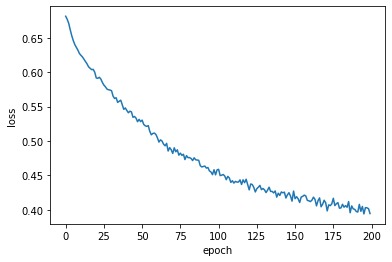

In [100]:
# loss vs epoch
epochs = [x for x in range(200)]
plt.plot(epochs, losses)
plt.xlabel('epoch')
plt.ylabel('loss')

### Hyperparameter Tuning

#### Step 1: Tuning n_estimators

In [122]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'n_estimators': [400,500,600]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(random_state = 0), 
 param_grid = param_test1, scoring='accuracy', n_jobs=-1)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([41.20235701, 52.53358517, 57.18639846]),
  'std_fit_time': array([0.04040351, 0.2816965 , 3.27713713]),
  'mean_score_time': array([0.07996578, 0.10338149, 0.06996007]),
  'std_score_time': array([0.00712948, 0.01236733, 0.00842643]),
  'param_n_estimators': masked_array(data=[400, 500, 600],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 400},
   {'n_estimators': 500},
   {'n_estimators': 600}],
  'split0_test_score': array([0.76779578, 0.77074129, 0.77417771]),
  'split1_test_score': array([0.7520864 , 0.75405007, 0.75601375]),
  'split2_test_score': array([0.7682867 , 0.76730486, 0.76779578]),
  'split3_test_score': array([0.75601375, 0.7520864 , 0.75306824]),
  'split4_test_score': array([0.77111984, 0.76768173, 0.77259332]),
  'mean_test_score': array([0.76306049, 0.76237287, 0.76472976]),
  'std_test_score': array([0.00754687, 0.00771517, 0.00863087]),
  'rank_test_score': ar

#### step 2: Tuning max_depth and min_child_weight

In [132]:
param_test2 = {
 'max_depth':[5,6,7],
 'min_child_weight':[1,2,3]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(n_estimators=600, random_state = 0), 
 param_grid = param_test2, scoring='accuracy',n_jobs=-1)
gsearch2.fit(X_train,y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([41.54408016, 41.70828357, 42.0341104 , 49.81253552, 49.72209306,
         50.51343665, 58.75630307, 57.75850043, 42.12788901]),
  'std_fit_time': array([0.0790135 , 0.27772995, 0.07556961, 0.14911168, 0.29428272,
         0.12645089, 0.24715431, 0.7484416 , 0.07853831]),
  'mean_score_time': array([0.07325015, 0.07154126, 0.06561279, 0.10323839, 0.09631701,
         0.090978  , 0.10604186, 0.10274715, 0.08397999]),
  'std_score_time': array([0.00587927, 0.00771823, 0.00110816, 0.0165882 , 0.01153875,
         0.00520367, 0.00871591, 0.0085868 , 0.0012635 ]),
  'param_max_depth': masked_array(data=[5, 5, 5, 6, 6, 6, 7, 7, 7],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 2, 3, 1, 2, 3, 1, 2, 3],
               mask=[False, False, False, False, False, False, False, False,
                     False],


#### step 3: Tuning gamma 

In [133]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,3)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(n_estimators=600, random_state = 0), 
 param_grid = param_test3, scoring='accuracy',n_jobs=-1)
gsearch3.fit(X_train,y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([49.33852296, 48.27497497, 46.73130345]),
  'std_fit_time': array([0.09438687, 1.15590082, 0.12834186]),
  'mean_score_time': array([0.10162477, 0.08629122, 0.04971318]),
  'std_score_time': array([0.01943841, 0.01478908, 0.00714264]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0}, {'gamma': 0.1}, {'gamma': 0.2}],
  'split0_test_score': array([0.77417771, 0.76877761, 0.76730486]),
  'split1_test_score': array([0.75601375, 0.75895925, 0.74423171]),
  'split2_test_score': array([0.76779578, 0.7574865 , 0.75699558]),
  'split3_test_score': array([0.75306824, 0.74717722, 0.74619539]),
  'split4_test_score': array([0.77259332, 0.76277014, 0.76424361]),
  'mean_test_score': array([0.76472976, 0.75903415, 0.75579423]),
  'std_test_score': array([0.00863087, 0.00709761, 0.00928611]),
  'rank_test_score': array([1, 2, 3], dtype=int32)},
 {'g

#### step 4: Tuning subsample and colsample_bytree

In [135]:
from sklearn.model_selection import GridSearchCV
param_test4 = {
 'subsample':[i/10.0 for i in range(8,11)],
 'colsample_bytree':[i/10.0 for i in range(8,11)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(n_estimators=600, random_state = 0), 
 param_grid = param_test4, scoring='accuracy', n_jobs=-1)
gsearch4.fit(X_train,y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([40.54449739, 40.59921751, 40.79017863, 46.43588619, 44.96782446,
         42.84716344, 49.28474693, 47.90321846, 33.14898744]),
  'std_fit_time': array([0.08637343, 0.96671309, 0.12034592, 0.42859945, 0.58799237,
         0.06952818, 0.0619363 , 0.66832292, 0.17985345]),
  'mean_score_time': array([0.08920302, 0.08667393, 0.08444576, 0.08485746, 0.08157573,
         0.08248878, 0.0827774 , 0.08018966, 0.06371951]),
  'std_score_time': array([0.00491904, 0.00176848, 0.00333433, 0.003752  , 0.00069034,
         0.00100207, 0.00196634, 0.00277623, 0.00295934]),
  'param_colsample_bytree': masked_array(data=[0.8, 0.8, 0.8, 0.9, 0.9, 0.9, 1.0, 1.0, 1.0],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.8, 0.9, 1.0, 0.8, 0.9, 1.0, 0.8, 0.9, 1.0],
               mask=[False, False, False, False, False, False, False, 

#### step5: Tuning alpha and lambda

In [137]:
from sklearn.model_selection import GridSearchCV
param_test5 = {
 'lambda':[0.5, 1, 2]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(n_estimators=600, random_state = 0), 
 param_grid = param_test5, scoring='accuracy', n_jobs=-1)
gsearch5.fit(X_train,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([46.63821721, 44.90517516, 42.27410531]),
  'std_fit_time': array([0.21612111, 1.96315756, 0.11787395]),
  'mean_score_time': array([0.08598685, 0.07766824, 0.06715469]),
  'std_score_time': array([0.00470924, 0.0107673 , 0.00707842]),
  'param_lambda': masked_array(data=[0.5, 1, 2],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'lambda': 0.5}, {'lambda': 1}, {'lambda': 2}],
  'split0_test_score': array([0.77074129, 0.77417771, 0.76975945]),
  'split1_test_score': array([0.74963181, 0.75601375, 0.74570447]),
  'split2_test_score': array([0.76681394, 0.76779578, 0.7520864 ]),
  'split3_test_score': array([0.75061365, 0.75306824, 0.76092293]),
  'split4_test_score': array([0.76866405, 0.77259332, 0.76424361]),
  'mean_test_score': array([0.76129295, 0.76472976, 0.75854337]),
  'std_test_score': array([0.00920994, 0.00863087, 0.00860797]),
  'rank_test_score': array([2, 1, 3], dtype=int32)},
 {'lambd

In [140]:
from sklearn.model_selection import GridSearchCV
param_test5 = {
 'alpha':[0, 0.1, 0.5, 1, 2]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(n_estimators=600, random_state = 0), 
 param_grid = param_test5, scoring='accuracy', n_jobs=-1)
gsearch5.fit(X_train,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([52.38409452, 51.97386169, 51.42591805, 36.81903501, 25.12800007]),
  'std_fit_time': array([0.12789725, 0.72056177, 0.26080384, 2.21716805, 5.1298926 ]),
  'mean_score_time': array([0.10075006, 0.10997739, 0.09641333, 0.05772157, 0.03607459]),
  'std_score_time': array([0.01033091, 0.01848049, 0.0072221 , 0.00988983, 0.00576771]),
  'param_alpha': masked_array(data=[0, 0.1, 0.5, 1, 2],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'alpha': 0},
   {'alpha': 0.1},
   {'alpha': 0.5},
   {'alpha': 1},
   {'alpha': 2}],
  'split0_test_score': array([0.77417771, 0.77074129, 0.77270496, 0.77515955, 0.77466863]),
  'split1_test_score': array([0.75601375, 0.75159548, 0.76043201, 0.75797742, 0.75355916]),
  'split2_test_score': array([0.76779578, 0.75797742, 0.7520864 , 0.76583211, 0.76190476]),
  'split3_test_score': array([0.75306824, 0.75110457, 0.75503191, 0.75503191, 0.75306824]),
  'spl

### Final Model

In [185]:
# Training the XGboost on the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 600, random_state = 0)
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

# evaluate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=5)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.765 accuracy with a standard deviation of 0.009


### Submission

In [142]:
Id = [i for i in range(1,2501)]
Id = pd.Series(Id)
Decision = pd.Series(y_pred)
output = pd.DataFrame({"id": Id,
                        "Decision": Decision})
output.to_csv('submission.csv', index=False)